In [13]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from chefboost import Chefboost

In [2]:
movie_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/movie_data.csv")
code_gender = {'M':1, 'F':0}
code_member = {'yes':1, 'no':0}
code_rating = {'very bad':1, 'bad':2, 'okay':3, 'good':4, 'very good':5}

movie_data["gender"] = movie_data["gender"].map(code_gender)
movie_data["member"] = movie_data["member"].map(code_member)
movie_data["rating"] = movie_data["rating"].map(code_rating)

X = movie_data.iloc[:, 0:4].values
y = movie_data.iloc[:, 4].values

In [3]:
# Splitting data into 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                random_state=42)


[Text(0.4, 0.9, 'age <= 25.5\ngini = 0.767\nsamples = 606\nvalue = [47.0, 93.0, 116.0, 171.0, 179.0]'),
 Text(0.2, 0.7, 'age <= 15.5\ngini = 0.524\nsamples = 136\nvalue = [0, 0, 4, 60, 72]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.481\nsamples = 38\nvalue = [0, 0, 2, 25, 11]'),
 Text(0.3, 0.5, 'gini = 0.485\nsamples = 98\nvalue = [0.0, 0.0, 2.0, 35.0, 61.0]'),
 Text(0.6, 0.7, 'age <= 37.5\ngini = 0.786\nsamples = 470\nvalue = [47, 93, 112, 111, 107]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.708\nsamples = 111\nvalue = [0, 8, 35, 35, 33]'),
 Text(0.7, 0.5, 'nmovies <= 2.5\ngini = 0.793\nsamples = 359\nvalue = [47, 85, 77, 76, 74]'),
 Text(0.6, 0.3, 'gini = 0.738\nsamples = 120\nvalue = [2, 16, 30, 39, 33]'),
 Text(0.8, 0.3, 'gender <= 0.5\ngini = 0.789\nsamples = 239\nvalue = [45, 69, 47, 37, 41]'),
 Text(0.7, 0.1, 'gini = 0.751\nsamples = 109\nvalue = [36, 33, 12, 18, 10]'),
 Text(0.9, 0.1, 'gini = 0.768\nsamples = 130\nvalue = [9, 36, 35, 1

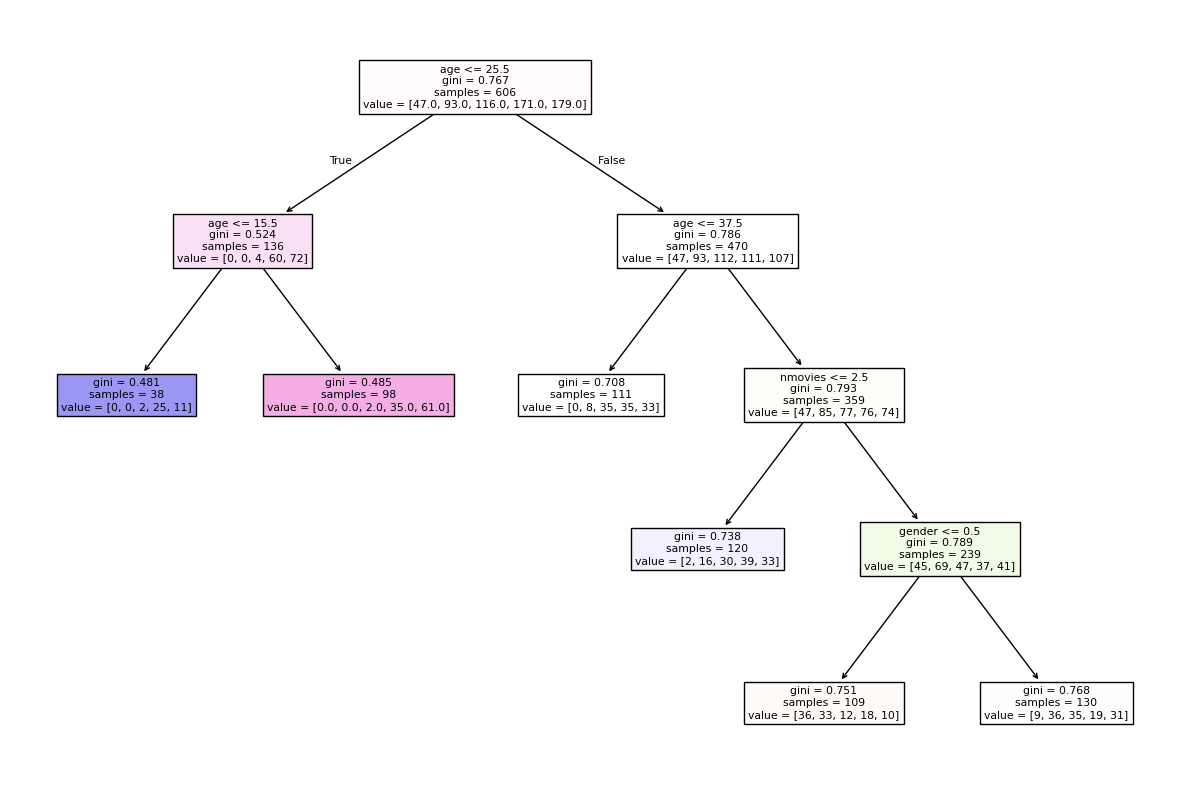

In [5]:
# Fitting multinomial classification tree using Gini splitting
# and cost-complexity pruning.

gini_tree = DecisionTreeClassifier(max_leaf_nodes=6,
                                   criterion='gini',
                                   random_state=707720)
gini_fitted = gini_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(gini_fitted, feature_names=['age', 'gender',
                                           'member', 'nmovies'],
                                           filled=True)

In [8]:
# Defining performance measures functions.

y_pred = gini_fitted.predict_proba(X_test)
pred_class = []
for i in range(0, len(y_pred)):
    pred_list = [y_pred[i,0], y_pred[i,1], y_pred[i,2],
                 y_pred[i,3], y_pred[i,4]]
    pred_class.append(pred_list.index(max(pred_list))+1)
pred_class = np.asarray(pred_class)

def perf_measures():
    
    #COMPUTING PERFORMANCE MEASURES FOR INDIVIDUAL CLASSES
    tp=[]
    fp=[]
    tn=[]
    fn=[]

    for cls in range(0,5):
        tp_sum=0
        fp_sum=0
        tn_sum=0
        fn_sum=0
        for sub1, sub2 in zip(pred_class, y_test):
            
            if sub1==cls+1 and sub2==cls+1:
                tp_class=1
                tp_sum+=tp_class
            else:
                tp_class=0
            
            if sub1==cls+1 and sub2!=cls+1:
                fp_class=1
                fp_sum+=fp_class
            
            else:
                fp_class=0  
            
            if sub1!=cls+1 and sub2!=cls+1:
                tn_class=1
                tn_sum+=tn_class
            else:
                tn_class=0

            if sub1!=cls+1 and sub2==cls+1:
                fn_class=1
                fn_sum+=fn_class
            else:
                fn_class=0
       
        tp.append(tp_sum)
        fp.append(fp_sum)
        tn.append(tn_sum)
        fn.append(fn_sum)


    accuracy=[]
    misclassrate=[]
    sensitivity=[]
    FNR=[]
    specificity=[]
    FPR=[]
    precision=[]
    NPV=[]
    F1score=[]    

    print('CLASS MEASURES:')
    for cls in range(5):
        accuracy_cls=(tp[cls]+tn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        misclassrate_cls=(fp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        sensitivity_cls=tp[cls]/(tp[cls]+fn[cls])
        FNR_cls=fn[cls]/(tp[cls]+fn[cls])
        specificity_cls=tn[cls]/(fp[cls]+tn[cls])
        FPR_cls=fp[cls]/(fp[cls]+tn[cls])
        if tp[cls]+fp[cls]==0:
            precision_cls=0
        else:
            precision_cls=tp[cls]/(tp[cls]+fp[cls])
        NPV_cls=tn[cls]/(fn[cls]+tn[cls])
        F1score_cls=2*tp[cls]/(2*tp[cls]+fn[cls]+fp[cls])
    
        accuracy.append(accuracy_cls)
        misclassrate.append(misclassrate_cls)
        sensitivity.append(sensitivity_cls)
        FNR.append(FNR_cls)
        specificity.append(specificity_cls)
        FPR.append(FPR_cls)
        precision.append(precision_cls)
        NPV.append(NPV_cls)
        F1score.append(F1score_cls)
    
        print()
        print('CLASS:', cls+1)
        print('tp:', tp[cls])
        print('fp:', fp[cls])
        print('tn:', tn[cls])
        print('fn:', fn[cls])
        print('accuracy:', accuracy[cls])
        print('misclassrate:', misclassrate[cls])
        print('sensitivity:', sensitivity[cls])
        print('FNR:', FNR[cls])
        print('specificity:', specificity[cls])
        print('FPR:', FPR[cls])
        print('precision:', precision[cls])
        print('NPV:', NPV[cls])
        print('F1score:', F1score[cls])
    
    #COMPUTING MICRO MEASURES 
    tp_sum=np.sum(tp)
    fp_sum=np.sum(fp)
    tn_sum=np.sum(tn)
    fn_sum=np.sum(fn)

    print()
    print('MICRO MEASURES:')
    accuracy_micro=(tp_sum+tn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    misclassrate_micro=(fp_sum+fn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    sensitivity_micro=tp_sum/(tp_sum+fn_sum)
    FNR_micro=fn_sum/(tp_sum+fn_sum)
    specificity_micro=tn_sum/(fp_sum+tn_sum)
    FPR_micro=fp_sum/(fp_sum+tn_sum)
    precision_micro=tp_sum/(tp_sum+fp_sum)
    NPV_micro=tn_sum/(fn_sum+tn_sum)
    F1score_micro=2*tp_sum/(2*tp_sum+fn_sum+fp_sum)

    print('accuracy:', accuracy_micro)
    print('misclassrate:', misclassrate_micro)
    print('sensitivity:', sensitivity_micro)
    print('FNR:', FNR_micro)
    print('specificity:', specificity_micro)
    print('FPR:', FPR_micro)
    print('precision:', precision_micro)
    print('NPV:', NPV_micro)
    print('F1-score:', F1score_micro)
      
    #COMPUTING MACRO MEASURES
    accuracy_macro=np.mean(accuracy)
    misclassrate_macro=np.mean(misclassrate)
    sensitivity_macro=np.mean(sensitivity)
    FNR_macro=np.mean(FNR)
    specificity_macro=np.mean(specificity)
    FPR_macro=np.mean(FPR)
    precision_macro=np.mean(precision)
    NPV_macro=np.mean(NPV)
    F1score_macro=np.mean(F1score)

    print()
    print('MACRO MEASURES:')
    print('accuracy:', accuracy_macro)
    print('misclassrate:', misclassrate_macro)
    print('sensitivity:', sensitivity_macro)
    print('FNR:', FNR_macro)
    print('specificity:', specificity_macro)
    print('FPR:', FPR_macro)
    print('precision:', precision_macro)
    print('NPV:', NPV_macro)
    print('F1-score:', F1score_macro)

    #COMPUTING WEIGHTED MACRO MEASURES
    weight=[]

    for cls in range(5):
        weight_cls=(tp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        weight.append(weight_cls)

    accuracy_wmacro=np.dot(weight,accuracy)
    misclassrate_wmacro=np.dot(weight,misclassrate)
    sensitivity_wmacro=np.dot(weight,sensitivity)
    FNR_wmacro=np.dot(weight,FNR)
    specificity_wmacro=np.dot(weight,specificity)
    FPR_wmacro=np.dot(weight,FPR)
    precision_wmacro = np.dot(weight,precision)
    NPV_wmacro=np.dot(weight,NPV)
    F1score_wmacro=np.dot(weight,F1score)

    print()
    print('WEIGHTED MACRO MEASURES:')
    print('accuracy:', accuracy_wmacro)
    print('misclassrate:', misclassrate_wmacro)
    print('sensitivity:', sensitivity_wmacro)
    print('FNR:', FNR_wmacro)
    print('specificity:', specificity_wmacro)
    print('FPR:', FPR_wmacro)
    print('precision:', precision_wmacro)
    print('NPV:', NPV_wmacro)
    print('F1-score:', F1score_wmacro)

In [9]:
perf_measures()

CLASS MEASURES:

CLASS: 1
tp: 4
fp: 25
tn: 120
fn: 3
accuracy: 0.8157894736842105
misclassrate: 0.18421052631578946
sensitivity: 0.5714285714285714
FNR: 0.42857142857142855
specificity: 0.8275862068965517
FPR: 0.1724137931034483
precision: 0.13793103448275862
NPV: 0.975609756097561
F1score: 0.2222222222222222

CLASS: 2
tp: 8
fp: 25
tn: 102
fn: 17
accuracy: 0.7236842105263158
misclassrate: 0.27631578947368424
sensitivity: 0.32
FNR: 0.68
specificity: 0.8031496062992126
FPR: 0.1968503937007874
precision: 0.24242424242424243
NPV: 0.8571428571428571
F1score: 0.27586206896551724

CLASS: 3
tp: 6
fp: 19
tn: 107
fn: 20
accuracy: 0.743421052631579
misclassrate: 0.2565789473684211
sensitivity: 0.23076923076923078
FNR: 0.7692307692307693
specificity: 0.8492063492063492
FPR: 0.15079365079365079
precision: 0.24
NPV: 0.84251968503937
F1score: 0.23529411764705882

CLASS: 4
tp: 5
fp: 29
tn: 80
fn: 38
accuracy: 0.5592105263157895
misclassrate: 0.4407894736842105
sensitivity: 0.11627906976744186
FNR: 0.8

[Text(0.2857142857142857, 0.9166666666666666, 'age <= 25.5\nentropy = 2.192\nsamples = 606\nvalue = [47.0, 93.0, 116.0, 171.0, 179.0]'),
 Text(0.14285714285714285, 0.75, 'entropy = 1.156\nsamples = 136\nvalue = [0, 0, 4, 60, 72]'),
 Text(0.21428571428571427, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.75, 'age <= 37.5\nentropy = 2.266\nsamples = 470\nvalue = [47, 93, 112, 111, 107]'),
 Text(0.3571428571428571, 0.8333333333333333, '  False'),
 Text(0.2857142857142857, 0.5833333333333334, 'entropy = 1.844\nsamples = 111\nvalue = [0, 8, 35, 35, 33]'),
 Text(0.5714285714285714, 0.5833333333333334, 'nmovies <= 2.5\nentropy = 2.296\nsamples = 359\nvalue = [47, 85, 77, 76, 74]'),
 Text(0.42857142857142855, 0.4166666666666667, 'entropy = 2.025\nsamples = 120\nvalue = [2, 16, 30, 39, 33]'),
 Text(0.7142857142857143, 0.4166666666666667, 'gender <= 0.5\nentropy = 2.285\nsamples = 239\nvalue = [45, 69, 47, 37, 41]'),
 Text(0.5714285714285714, 0.25, 'age <= 43.5\nentropy = 2.145\nsa

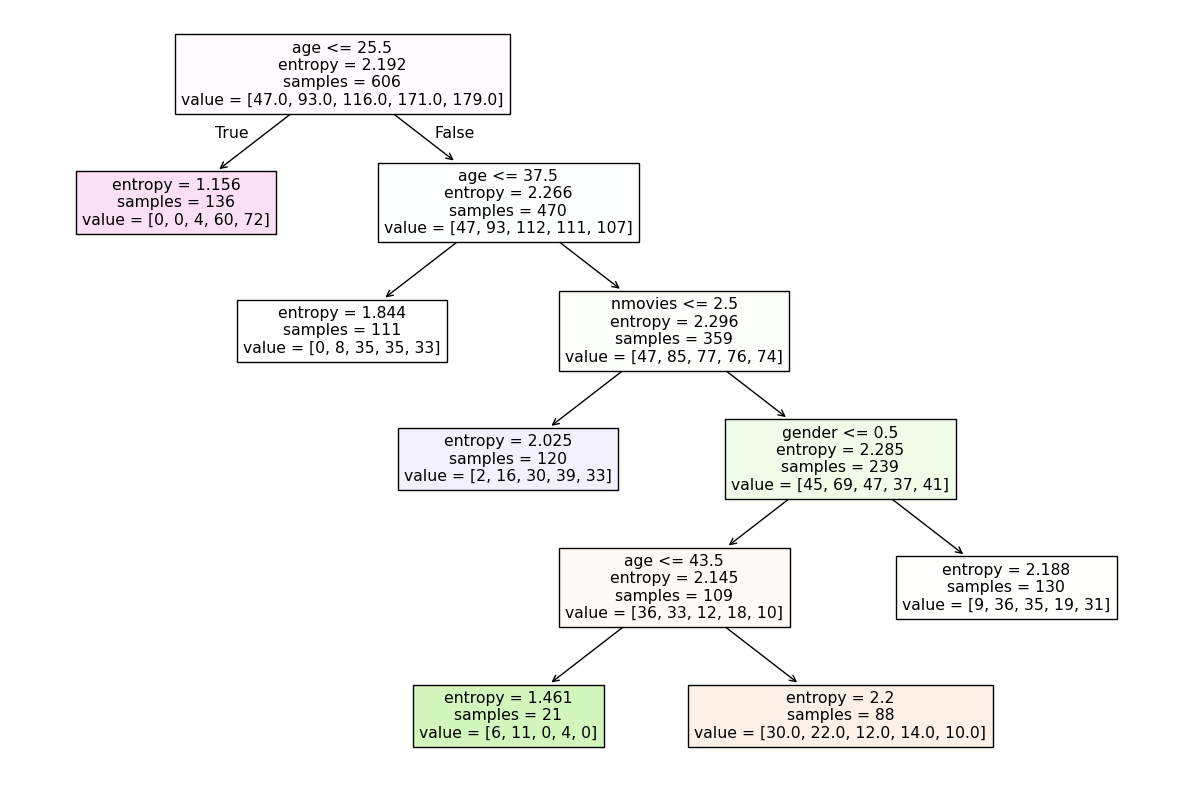

In [11]:
# Fitting multinomial classification tree using the Entropy
# Criterion.

entropy_tree = DecisionTreeClassifier(max_leaf_nodes=6,
                                      criterion='entropy',
                                      random_state=42)
entropy_fit = entropy_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(entropy_fit, feature_names=['age', 'gender',
                                           'member',
                                           'nmovies'],
                                           filled=True)


In [12]:
y_pred = entropy_tree.predict_proba(X_test)
predclass = []
for i in range(0, len(y_pred)):
    pred_list = [y_pred[i,0], y_pred[i,1], y_pred[i,2],
                 y_pred[i,3], y_pred[i,4]]
    predclass.append(pred_list.index(max(pred_list))+1)
predclass = np.asarray(predclass)

print()
print("Performance measures for fitted Entropy tree:")
perf_measures()


Performance measures for fitted Entropy tree:
CLASS MEASURES:

CLASS: 1
tp: 4
fp: 25
tn: 120
fn: 3
accuracy: 0.8157894736842105
misclassrate: 0.18421052631578946
sensitivity: 0.5714285714285714
FNR: 0.42857142857142855
specificity: 0.8275862068965517
FPR: 0.1724137931034483
precision: 0.13793103448275862
NPV: 0.975609756097561
F1score: 0.2222222222222222

CLASS: 2
tp: 8
fp: 25
tn: 102
fn: 17
accuracy: 0.7236842105263158
misclassrate: 0.27631578947368424
sensitivity: 0.32
FNR: 0.68
specificity: 0.8031496062992126
FPR: 0.1968503937007874
precision: 0.24242424242424243
NPV: 0.8571428571428571
F1score: 0.27586206896551724

CLASS: 3
tp: 6
fp: 19
tn: 107
fn: 20
accuracy: 0.743421052631579
misclassrate: 0.2565789473684211
sensitivity: 0.23076923076923078
FNR: 0.7692307692307693
specificity: 0.8492063492063492
FPR: 0.15079365079365079
precision: 0.24
NPV: 0.84251968503937
F1score: 0.23529411764705882

CLASS: 4
tp: 5
fp: 29
tn: 80
fn: 38
accuracy: 0.5592105263157895
misclassrate: 0.44078947368

In [ ]:
movie_data=pd.read_csv('C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/movie_data.csv')
code_gender={'M':1,'F':0}
code_member={'yes':1,'no':0}
#Note: rating is used as nominal

movie_data['gender']=movie_data['gender'].map(code_gender)
movie_data['member']=movie_data['member'].map(code_member)

X=movie_data.iloc[:,0:4].values
y=movie_data.iloc[:,4].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=687088)

X_train=pd.DataFrame(X_train, columns=['gender','age','member','nmovies'])
y_train=pd.DataFrame(y_train, columns=['rating'])
train_data=pd.concat([X_train, y_train], axis=1) #one-to-one concatenation

#FITTING BINARY TREE WITH CHAID SPLITTING ALGORITHM
config={'algorithm': 'CHAID', 'max_depth': 3}
tree_chaid=Chefboost.fit(train_data, config, target_label='rating')

#COMPUTING PREDICTION ACCURACY
X_test=pd.DataFrame(X_test, columns=['gender','age','member','nmovies'])

y_pred=[]
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))
predclass = np.asarray(y_pred)

#COMPUTING PERFORMANCE MEASURES FOR FITTED CHAID TREE
#turning rating into ordinal to use perf_measures function
code_rating={'very bad':1,'bad':2,'okay':3,'good':4,'very good':5}
df=pd.DataFrame({'y_test': y_test,'predclass': predclass})
df['y_test']=df['y_test'].map(code_rating)
df['predclass']=df['predclass'].map(code_rating)
y_test=df['y_test']
predclass=df['predclass']


25-02-18 16:52:29 - CHAID tree is going to be built...
25-02-18 16:52:32 - -------------------------
25-02-18 16:52:32 - finished in 2.7666077613830566 seconds
25-02-18 16:52:32 - -------------------------
25-02-18 16:52:32 - Evaluate train set
25-02-18 16:52:32 - -------------------------
25-02-18 16:52:32 - Accuracy: 34.65346534653465% on 606 instances
25-02-18 16:52:32 - Labels: ['good' 'okay' 'very good' 'very bad' 'bad']
25-02-18 16:52:32 - Confusion matrix: [[95, 71, 72, 25, 60], [0, 0, 0, 0, 0], [78, 46, 109, 14, 27], [0, 0, 0, 2, 0], [0, 0, 0, 3, 4]]
25-02-18 16:52:32 - Decision good
25-02-18 16:52:32 - Accuracy: 49.505
25-02-18 16:52:32 - Precision: 29.4118%, Recall: 54.9133%, F1: 38.3065%
25-02-18 16:52:32 - Decision okay
25-02-18 16:52:32 - Accuracy: 80.6931
25-02-18 16:52:32 - Precision: 0.0%, Recall: 0.0%, F1: 0.0%
25-02-18 16:52:32 - Decision very good
25-02-18 16:52:32 - Accuracy: 60.8911
25-02-18 16:52:32 - Precision: 39.781%, Recall: 60.221%, F1: 47.9121%
25-02-18 16:5

c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0]>24.271368369871787:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3]<=6:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[2]>0:
c:\U

In [16]:
print()
print('PERFORMANCE MEASURES FOR FITTED CHAID TREE')
perf_measures()


PERFORMANCE MEASURES FOR FITTED CHAID TREE
CLASS MEASURES:

CLASS: 1
tp: 1
fp: 28
tn: 114
fn: 9
accuracy: 0.756578947368421
misclassrate: 0.24342105263157895
sensitivity: 0.1
FNR: 0.9
specificity: 0.8028169014084507
FPR: 0.19718309859154928
precision: 0.034482758620689655
NPV: 0.926829268292683
F1score: 0.05128205128205128

CLASS: 2
tp: 6
fp: 27
tn: 98
fn: 21
accuracy: 0.6842105263157895
misclassrate: 0.3157894736842105
sensitivity: 0.2222222222222222
FNR: 0.7777777777777778
specificity: 0.784
FPR: 0.216
precision: 0.18181818181818182
NPV: 0.8235294117647058
F1score: 0.2

CLASS: 3
tp: 4
fp: 21
tn: 106
fn: 21
accuracy: 0.7236842105263158
misclassrate: 0.27631578947368424
sensitivity: 0.16
FNR: 0.84
specificity: 0.8346456692913385
FPR: 0.16535433070866143
precision: 0.16
NPV: 0.8346456692913385
F1score: 0.16

CLASS: 4
tp: 8
fp: 26
tn: 85
fn: 33
accuracy: 0.6118421052631579
misclassrate: 0.3881578947368421
sensitivity: 0.1951219512195122
FNR: 0.8048780487804879
specificity: 0.76576576576